In [1]:
import fitz
import os

In [10]:
pdf_path = "../data/pdf"
num_papers = 20
pdf_name_ls = sorted(os.listdir(pdf_path))
pdf_path_ls = [os.path.join(pdf_path, pdf_name) for pdf_name in pdf_name_ls]

first_page_texts = []
for pdf in pdf_path_ls:
    doc = fitz.open(pdf)
    first_page = doc[0]
    first_page_text = first_page.get_text()
    first_page_texts.append(first_page_text)

(array([2., 0., 0., 3., 3., 4., 1., 0., 0., 2., 2., 2., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([181. , 216.4, 251.8, 287.2, 322.6, 358. , 393.4, 428.8, 464.2,
        499.6, 535. , 570.4, 605.8, 641.2, 676.6, 712. , 747.4, 782.8,
        818.2, 853.6, 889. ]),
 <BarContainer object of 20 artists>)

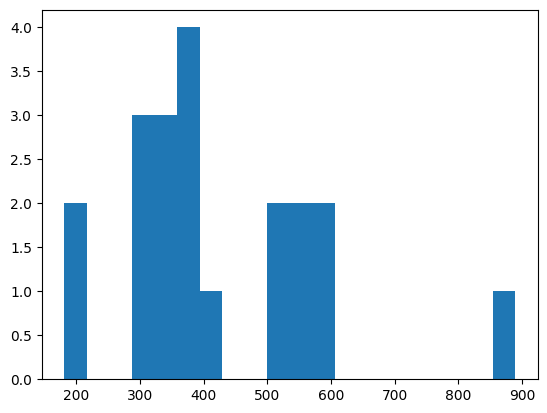

In [13]:
import matplotlib.pyplot as plt

plt.hist([len(text.split()) for text in first_page_texts], bins=20)

In [11]:
for text, pdf_name in zip(first_page_texts, pdf_name_ls):
    print(f"Text from {pdf_name}:\n{text}\n")

Text from 1209.0367v4.pdf:
Seeded Graph Matching
Donniell E. Fishkind * 1, Sancar Adali2, Heather G. Patsolic1, Lingyao Meng1,
Digvijay Singh3, Vince Lyzinski4 and Carey E. Priebe1
1Department of Applied Mathematics and Statistics, Johns Hopkins University
2Raytheon BBN Technologies
3Information Security Institute, Department of Computer Science, Johns
Hopkins University
4Department of Mathematics and Statistics, University of Massachusetts
Amherst
April 3, 2024
Abstract
Given two graphs, the graph matching problem is to align the two vertex sets so as to
minimize the number of adjacency disagreements between the two graphs. The seeded graph
matching problem is the graph matching problem when we are ﬁrst given a partial alignment
that we are tasked with completing. In this article, we modify the state-of-the-art approximate
graph matching algorithm “FAQ” of Vogelstein et al. (2015) to make it a fast approximate
seeded graph matching algorithm, adapt its applicability to include graphs 

In [14]:
from openai import OpenAI
client = OpenAI()

assistant = client.beta.assistants.create(
    name = "Author-Institution Matcher",
    instructions = "Given a paper's first page text, identify the authors and their institutions. Organise response in the following format: for each row, [Author Name] | [Departments or Affiliations, divide by ',' if more than 1] | [University / College], put value N/A if nothing matches.",
    model = "gpt-4o-mini-2024-07-18"
)

In [15]:
thread = client.beta.threads.create()

In [17]:
message = client.beta.threads.messages.create(
    thread_id = thread.id,
    role="user",
    content = first_page_texts[0]
)

In [18]:
run = client.beta.threads.runs.create_and_poll(
  thread_id=thread.id,
  assistant_id=assistant.id
)

In [41]:
if run.status == 'completed': 
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  content = messages.data[0].content
  print(type(content))
  print(len(content))
  print(content[0].to_dict()['text']['value'])
else:
  print(run.status)

<class 'list'>
1
Donniell E. Fishkind | Department of Applied Mathematics and Statistics | Johns Hopkins University  
Sancar Adali | Raytheon BBN Technologies | Raytheon BBN Technologies  
Heather G. Patsolic | Department of Applied Mathematics and Statistics | Johns Hopkins University  
Lingyao Meng | Department of Applied Mathematics and Statistics | Johns Hopkins University  
Digvijay Singh | Information Security Institute, Department of Computer Science | Johns Hopkins University  
Vince Lyzinski | Department of Mathematics and Statistics | University of Massachusetts Amherst  
Carey E. Priebe | Department of Applied Mathematics and Statistics | Johns Hopkins University  


In [15]:
import re

pattern = r'^\s*(?P<author>[A-Za-z\s]+)\s*\|\s*(?P<departments>[A-Za-z\s,]+)\s*\|\s*(?P<institution>[A-Za-z\s/]+)\s*$'

# response = content[0].to_dict()['text']['value']

# matches = re.findall(pattern, response, re.MULTILINE)

In [44]:
if matches:
    for match in matches:
        print(f"Author: {match[0]}, Departments: {match[1]}, Institution: {match[2]}")

<class 'str'>
Author: Sancar Adali , Departments: Raytheon BBN Technologies , Institution: Raytheon BBN Technologies  
Author: Lingyao Meng , Departments: Department of Applied Mathematics and Statistics , Institution: Johns Hopkins University  
Author: Digvijay Singh , Departments: Information Security Institute, Department of Computer Science , Institution: Johns Hopkins University  
Author: Vince Lyzinski , Departments: Department of Mathematics and Statistics , Institution: University of Massachusetts Amherst  


In [18]:
text = "Carey E. Priebe | Department of Applied Mathematics and Statistics, Center for Imaging Science, Mathematical Institute for Data Science | Johns Hopkins University\nCencheng Shen | Department of Applied Economics and Statistics | University of Delaware\nNingyuan (Teresa) Huang | Department of Applied Mathematics and Statistics | Johns Hopkins University\nTianyi Chen | Department of Applied Mathematics and Statistics | Johns Hopkins University "
for line in text.split('\n'):
    match = re.match(pattern, line)
    if match:
        print(f"Author: {match.group('author')}, Departments: {match.group('departments')}, Institution: {match.group('institution')}")

Author: Cencheng Shen , Departments: Department of Applied Economics and Statistics , Institution: University of Delaware
Author: Tianyi Chen , Departments: Department of Applied Mathematics and Statistics , Institution: Johns Hopkins University 


In [17]:
for line in 

[('Cencheng Shen ',
  'Department of Applied Economics and Statistics ',
  'University of Delaware'),
 ('Tianyi Chen ',
  'Department of Applied Mathematics and Statistics ',
  'Johns Hopkins University ')]

In [19]:
import pickle

In [23]:
load_path = "../data/author_affiliation/author_affiliation.pkl"
with open(load_path, 'rb') as f:
    _, affiliation_dict = pickle.load(f)

In [24]:
_

{'1209.0367v4.pdf',
 '1211.3601v4.pdf',
 '1305.4893v1.pdf',
 '1403.4628v2.pdf',
 '1404.7421v2.pdf',
 '1405.6070v3.pdf',
 '1502.01368v4.pdf',
 '1506.03410v6.pdf',
 '1607.08601v1.pdf',
 '1609.01672v3.pdf',
 '1609.05148v8.pdf',
 '1611.01491v6.pdf',
 '1701.06692v1.pdf',
 '1703.03862v4.pdf',
 '1705.00674v5.pdf',
 '1705.03297v1.pdf',
 '1708.03735v2.pdf',
 '1709.05454v1.pdf',
 '1709.05506v5.pdf',
 '1710.09768v3.pdf',
 '1711.03073v2.pdf',
 '1711.05610v4.pdf',
 '1803.02423v3.pdf',
 '1808.07801v3.pdf',
 '1808.08502v4.pdf',
 '1812.10519v4.pdf',
 '1904.02926v4.pdf',
 '1905.01776v3.pdf',
 '1907.02844v1.pdf',
 '1908.02572v3.pdf',
 '1908.06438v2.pdf',
 '1910.00423v1.pdf',
 '2002.01648v3.pdf',
 '2003.14250v1.pdf',
 '2004.07348v6.pdf',
 '2004.12908v19.pdf',
 '2005.10700v3.pdf',
 '2007.02156v3.pdf',
 '2010.13152v3.pdf',
 '2011.06557v1.pdf',
 '2101.12430v2.pdf',
 '2102.09994v3.pdf',
 '2105.14835v5.pdf',
 '2106.12621v1.pdf',
 '2108.13637v4.pdf',
 '2109.13098v3.pdf',
 '2111.05366v1.pdf',
 '2111.08117v4.pdf

In [26]:
affiliation_dict["AMITABH BASU"]

{'Johns Hopkins University': ['Department of Applied Mathematics and Statistics']}